<a href="https://colab.research.google.com/github/tarikaytek/tensorflow-developer-professional-certificate/blob/main/C1W1_a-computer-vision-example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#loading data 
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()


LABEL: 5
shape of an image: (28, 28)

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 

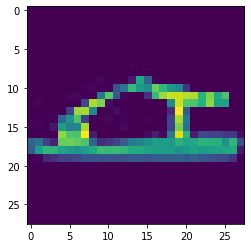

In [14]:
#an example
index = 120
np.set_printoptions(linewidth=320)

print(f'LABEL: {training_labels[index]}')
print('shape of an image:', training_images[index].shape)
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')
plt.imshow(training_images[index])


In [15]:
#normalizing
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [16]:
#creating model by implementing its each layer
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [17]:
#compiling model with chosen optimizer, loss and evaluation metric
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
#fitting model to training data 
model.fit(training_images, training_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4970 - accuracy: 0.8254
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3782 - accuracy: 0.8642
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3398 - accuracy: 0.8759
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3142 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2961 - accuracy: 0.8913


In [19]:
#evaluating the model in the test data
model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 1ms/step - loss: 0.3629 - accuracy: 0.8717


[0.36287224292755127, 0.8716999888420105]

In [24]:
# for seeing model's predictions
classifications = model.predict(test_images)

print(classifications[12])

[6.8485019e-06 2.2187928e-06 9.9166655e-06 1.4640111e-07 8.2152059e-05 4.8264572e-01 9.1950440e-08 4.9320602e-01 2.4043750e-02 3.2276569e-06]


In [25]:
print(test_labels[12])


7


In [26]:
#trying with different model to see the differences
#what we changed is number of units in first dense layer
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2824
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2689
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2577
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2491
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3449
[2.5349191e-06 7.8424812e-08 2.0126613e-07 4.0669146e-10 5.3343823e-09 3.6284286e-03 5.0308546e-07 5.8263876e-03 7.4838226e-07 9.9054116e-01]
9


In [27]:
#even more increasing of number of units
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2321
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2241
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2167
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2108
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3454
[3.5742065e-08 7.6141937e-09 3.6640227e-08 2.4510752e-12 3.8927175e-10 2.3343450e-04 2.4132776e-08 3.6585850e-03 3.0816349e-08 9.9610788e-01]
9


In [28]:
#changing epochs 
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=15)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2012
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1936
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1876
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1837
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1776
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1718
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1689
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1653
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1613
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1574
Epoch 11/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1544
Epoch 12/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1492
E

In [29]:
#increasing epochs number even more (which can cause overfitting)
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1391
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1364
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1309
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1278
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1270
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1239
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1238
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1188
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1155
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1144
Epoch 11/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1120
Epoch 12/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1141
E

it overfits even with 15 epochs as it can be seen clearly 

In [30]:
#writing callback to stop model when its reached to a wanted accuracy

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.2):
            print("\nReached 0.2 loss so cancelling training!")
            self.model.stop_training = True

In [33]:
callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=15, callbacks=[callbacks])

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4743 - accuracy: 0.8306
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3552 - accuracy: 0.8696
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3225 - accuracy: 0.8804
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2960 - accuracy: 0.8901
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2801 - accuracy: 0.8962
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2648 - accuracy: 0.9014
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2522 - accuracy: 0.9054
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2416 - accuracy: 0.9091
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2303 - accuracy: 0.9143
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.22

In [34]:
#lets see how it does in test data now
model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 0.3380 - accuracy: 0.8900


[0.3379736542701721, 0.8899999856948853]

In [36]:
#lets try by increasing and decreasing threshold for loss to see how overfitting works for this data
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.1):
            print("\nReached 0.2 loss so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=15, callbacks=[callbacks])
model.evaluate(test_images, test_labels)


Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4716 - accuracy: 0.8320
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3607 - accuracy: 0.8677
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3229 - accuracy: 0.8813
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2996 - accuracy: 0.8888
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2809 - accuracy: 0.8960
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2665 - accuracy: 0.9005
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2519 - accuracy: 0.9048
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2437 - accuracy: 0.9088
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2299 - accuracy: 0.9127
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.220

[0.3504781126976013, 0.8866000175476074]

In [37]:
#lets try by increasing and decreasing threshold for loss to see how overfitting works for this data
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.35):
            print("\nReached 0.2 loss so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=15, callbacks=[callbacks])
model.evaluate(test_images, test_labels)


Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4758 - accuracy: 0.8297
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3597 - accuracy: 0.8687
Epoch 3/15
1874/1875 [============================>.] - ETA: 0s - loss: 0.3218 - accuracy: 0.8812
Reached 0.2 loss so cancelling training!
313/313 [==============================] - 1s 2ms/step - loss: 0.3587 - accuracy: 0.8724


[0.35874655842781067, 0.8723999857902527]

so it seems the proper threshold for loss should be between 0.1 and 0.35 where its close to 0.2